## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = 'C:\\Users\\mara0608\\Desktop\\AI_Learning\\Open_living\\ML100DAYS_ming\\DAY2'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [10]:
#app_train.head()
app_train['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [16]:
#等寬劃分：按照相同寬度將資料分成幾等份。缺點是受到異常值的影響比較⼤。
app_train['Equal_width_DAYS_BIRTH'] = pd.cut(app_train['DAYS_BIRTH'], 8)
app_train['Equal_width_DAYS_BIRTH'].value_counts() # 每個 bin 的值的範圍大小都是一樣的

(14141.5, 16359.0]    51100
(11924.0, 14141.5]    49708
(9706.5, 11924.0]     47520
(18576.5, 20794.0]    42345
(16359.0, 18576.5]    42340
(20794.0, 23011.5]    37281
(7471.26, 9706.5]     19016
(23011.5, 25229.0]    18201
Name: Equal_width_DAYS_BIRTH, dtype: int64

In [18]:
#等頻劃分：將資料分成幾等份，每等份資料裡⾯的個數是⼀樣的。
app_train['Equal_freq_DAYS_BIRTH'] = pd.qcut(app_train['DAYS_BIRTH'], 8)
app_train['Equal_freq_DAYS_BIRTH'].value_counts() # 每個 bin 的資料筆數是一樣的

(7488.999, 10639.0]    38451
(15750.0, 17623.0]     38448
(12413.0, 14107.0]     38445
(17623.0, 19682.0]     38439
(10639.0, 12413.0]     38433
(21748.0, 25229.0]     38432
(14107.0, 15750.0]     38432
(19682.0, 21748.0]     38431
Name: Equal_freq_DAYS_BIRTH, dtype: int64

In [91]:
#自定義的 bin
(app_train['DAYS_BIRTH'] / 365).sort_values()
app_train['customized_DAYS_BIRTH'] = pd.cut(app_train['DAYS_BIRTH'] / 365 , [20, 30, 40, 50, 60,70])
app_train['customized_DAYS_BIRTH'].value_counts()

(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: customized_DAYS_BIRTH, dtype: int64

In [97]:
grp = ['customized_DAYS_BIRTH']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

customized_DAYS_BIRTH
(20, 30]    159520.624754
(30, 40]    178888.784549
(40, 50]    180565.509225
(50, 60]    165128.297171
(60, 70]    138897.496600
Name: AMT_INCOME_TOTAL, dtype: float64

C:\Users\mara0608\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


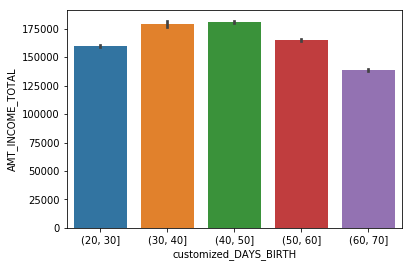

In [102]:
import seaborn as sns
px = app_train['customized_DAYS_BIRTH']
py = app_train['AMT_INCOME_TOTAL']
sns.barplot(px, py)